<a href="https://colab.research.google.com/github/Magaton1010/image-analysis/blob/main/IQA_GLCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

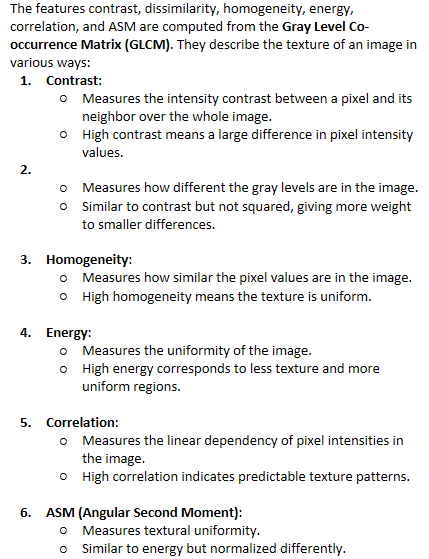

In [32]:
import os
import pandas as pd
from skimage import io, color
from skimage.transform import resize
from skimage.feature import graycomatrix, graycoprops
import numpy as np

def compute_brisque(image):
    # Ensure the image is grayscale
    if len(image.shape) == 3:  # Convert color or RGBA image to grayscale
        if image.shape[2] == 4:  # RGBA
            image = color.rgba2rgb(image)  # Convert RGBA to RGB
        image = color.rgb2gray(image)  # Convert RGB to grayscale

    # Normalize the image to 0-255 if necessary
    image = (image * 255).astype(np.uint8) if image.max() <= 1 else image

    # Resize image to 256x256
    image = resize(image, (256, 256), anti_aliasing=True)
    image = (image * 255).astype(np.uint8)  # Ensure it remains in 8-bit range

    # Compute GLCM (Grey Level Co-occurrence Matrix)
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    return np.array([contrast, dissimilarity, homogeneity, energy, correlation, asm])

# Input and output directories
input_folder_path =
output_file_path =

# Ensure output directory exists
os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

# List to store the results
results = []

# Process all .tif files in the folder
for filename in os.listdir(input_folder_path):
    if filename.lower().endswith('.tif'):
        try:
            # Full path to the file
            file_path = os.path.join(input_folder_path, filename)

            # Read the image
            image = io.imread(file_path)

            # Compute BRISQUE features
            score = compute_brisque(image)

            # Append the result to the list
            results.append([filename] + score.tolist())
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['File Name', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM'])

# Save the DataFrame to an Excel file
df.to_excel(output_file_path, index=False)

print(f"BRISQUE scores have been computed and saved to {output_file_path}.")



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\h.ghaderian\\Desktop\\QAQC_images\\OUTPUT'